In [1]:
from notebooks.util.distribution_utils import *

from liquidity.util.utils import compute_returns
from hurst_exponent.util.utils import augmented_dickey_fuller

In [2]:
# Automatically reload changes in package dependencies
%load_ext autoreload
%autoreload 2

In [3]:
# Number of events to use
EVENTS_RANGE = 100000

## Load limit orders raw sample data

In [4]:
# Load orderbook raw sample data
stocks = ['TSLA', 'AMZN', 'NFLX', 'MSFT', 'EBAY', 'APPL']

current_dir = os.path.abspath('.')
root_dir = os.path.join(current_dir, '..', '..')
data_dir = os.path.join(root_dir, 'data', 'limit_orders')

stock_dfs = {}

# Loop through each stock
for stock in stocks:

    filename = f"{stock}-2016-R1-LO.csv"

    stock_file_path = os.path.join(data_dir, filename)

    # Read the CSV and store in the dictionary
    stock_dfs[stock] = pd.read_csv(stock_file_path)

# Access the dataframe using stock's ticker as key
tsla_raw_df = stock_dfs['TSLA']
amzn_raw_df = stock_dfs['AMZN']
nflx_raw_df = stock_dfs['NFLX']
msft_raw_df = stock_dfs['MSFT']
ebay_raw_df = stock_dfs['EBAY']
appl_raw_df = stock_dfs['APPL']

## 1. Returns

In [5]:
# Compute returns
tsla_returns = compute_returns(tsla_raw_df)['returns']
msft_returns = compute_returns(msft_raw_df)['returns']
amzn_returns = compute_returns(amzn_raw_df)['returns']
nflx_returns = compute_returns(nflx_raw_df)['returns']
ebay_returns = compute_returns(ebay_raw_df)['returns']
appl_returns = compute_returns(appl_raw_df)['returns']

returns = {
  'TSLA': tsla_returns,
  'MSFT': msft_returns,
  'AMZN': amzn_returns,
  'NFLX': nflx_returns,
  'EBAY': ebay_returns,
  'APPL': appl_returns
}
# Update the dictionary to only keep the first EVENTS_RANGE items
# returns = {stock: data.head(1000000) for stock, data in returns.items()}

### 1.1. Stationarity Test

To test whether our time series are stationary, we perform an augmented Dickey-Fuller test on each series, which uses the following null and alternative hypotheses:

- **H0:** The time series is non-stationary.
  - In other words, it has some time-dependent structure and does not have constant variance over time.
  - There is at least one unit root.

- **H1:** The time series is stationary.

- **Note:** If the p-value from the test is less than some significance level (e.g. $\alpha$ = .05), then we can reject the null hypothesis and conclude that the time series is stationary.

In [6]:
# ADF test
for stock, data in returns.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

TSLA
ADF: -67.34
p-value: 0.00,
N: 99976, 
critical values: {'1%': -3.430415410377573, '5%': -2.861568910362029, '10%': -2.566785387974081}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -50.40
p-value: 0.00,
N: 99962, 
critical values: {'1%': -3.430415419538742, '5%': -2.8615689144110776, '10%': -2.566785390129256}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -315.51
p-value: 0.00,
N: 99999, 
critical values: {'1%': -3.4304153953326493, '5%': -2.8615689037124814, '10%': -2.566785384434747}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -227.47
p-value: 0.00,
N: 99998, 
critical values: {'1%': -3.4304153959866324, '5%': -2.861568904001529, '10%': -2.5667853845885973}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


EBAY


### 1.2. Plot returns density functions

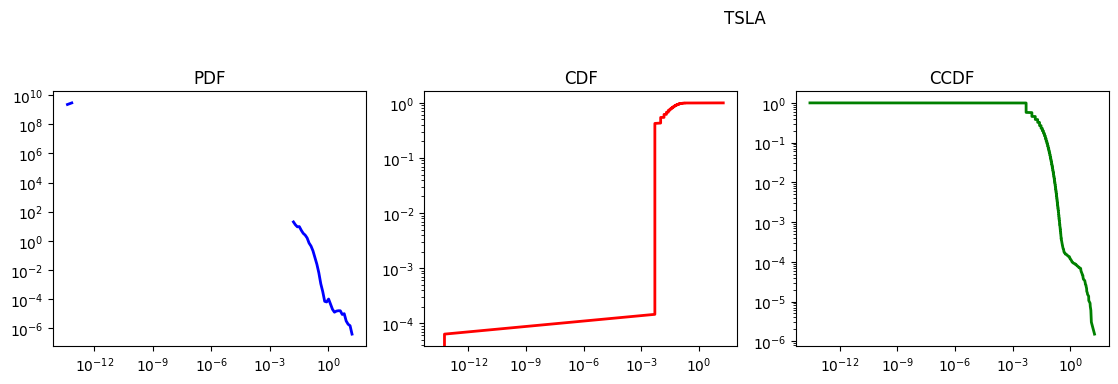

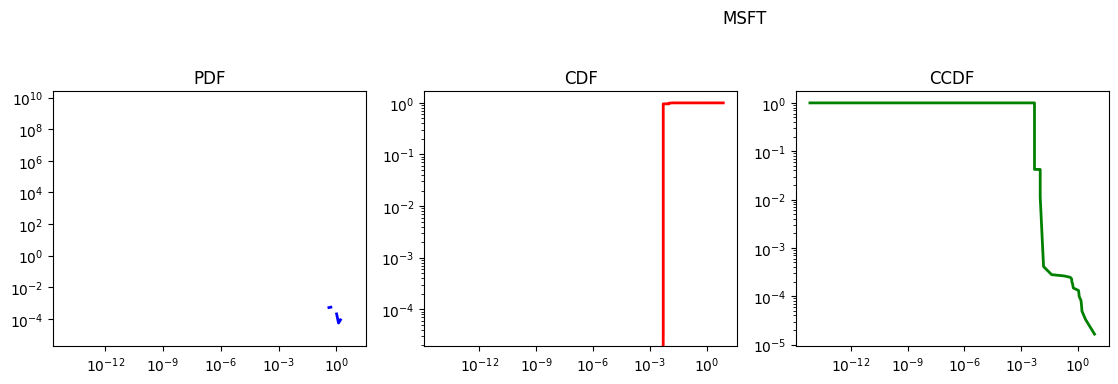

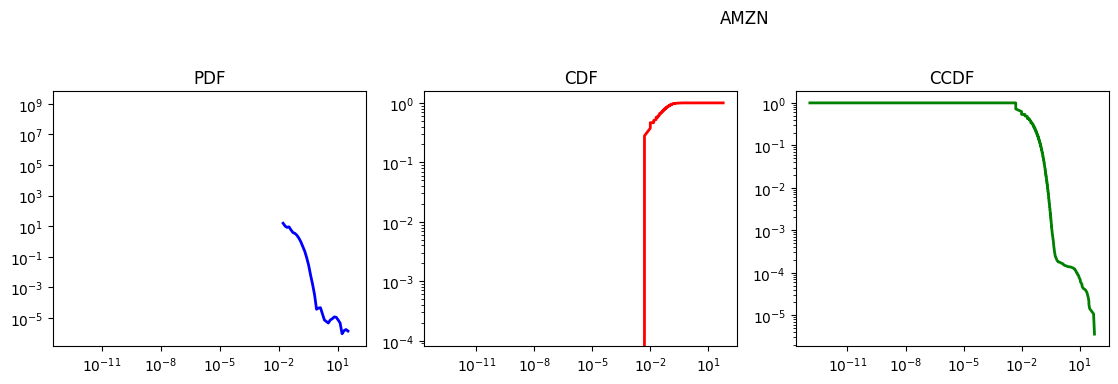

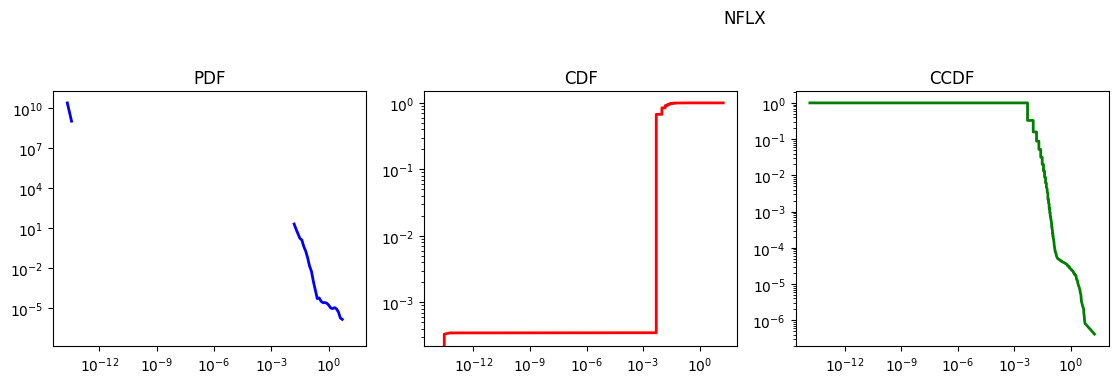

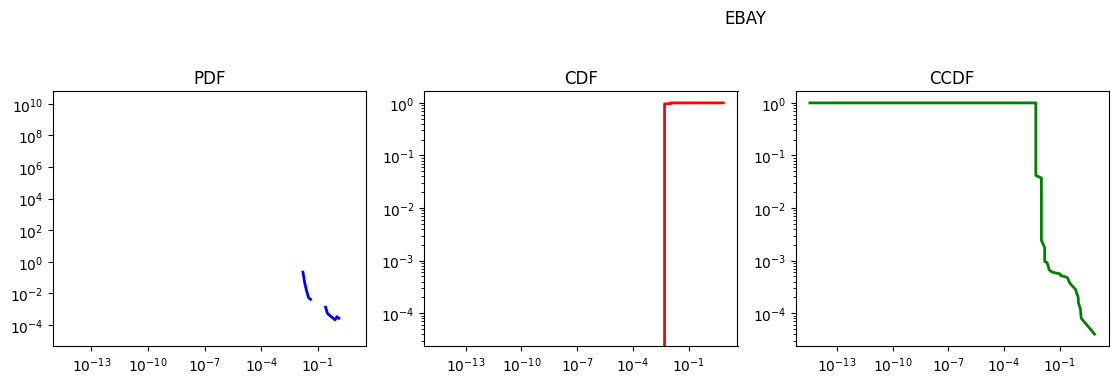

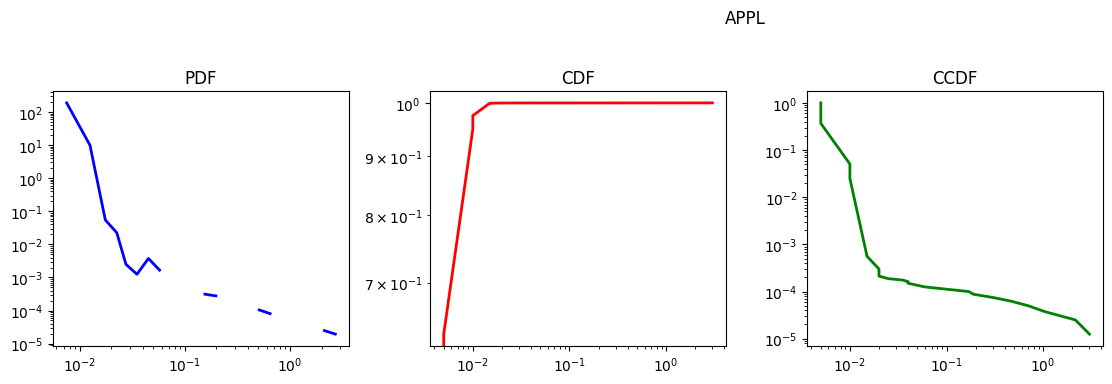

In [7]:
# Plot for each stock
for stock_name, data in returns.items():
    plot_distributions(stock_name, data)

### 1.3. Fit returns power law distribution

In [8]:
# 1. Fit Powerlaw and retrieve fitted object/ results
returns_distributions_data = os.path.join(root_dir, 'data', 'generated', 'lo_data', 'distributions', 'lo_returns_distributions.pkl')

if not os.path.exists(returns_distributions_data):
    returns_fit_objects = fit_powerlaw(data_dict=returns, filename=returns_distributions_data)
else:
    returns_fit_objects = load_fit_objects(returns_distributions_data)

returns_fit_objects

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


{'TSLA': <powerlaw.Fit at 0x30840fad0>,
 'MSFT': <powerlaw.Fit at 0x284655e50>,
 'AMZN': <powerlaw.Fit at 0x2aa450e50>,
 'NFLX': <powerlaw.Fit at 0x2aa2eff90>,
 'EBAY': <powerlaw.Fit at 0x2aa2f39d0>,
 'APPL': <powerlaw.Fit at 0x2aa1f1590>}

/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1507: RuntimeWarning: overflow encountered in divide
  likelihoods = f/C
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overf

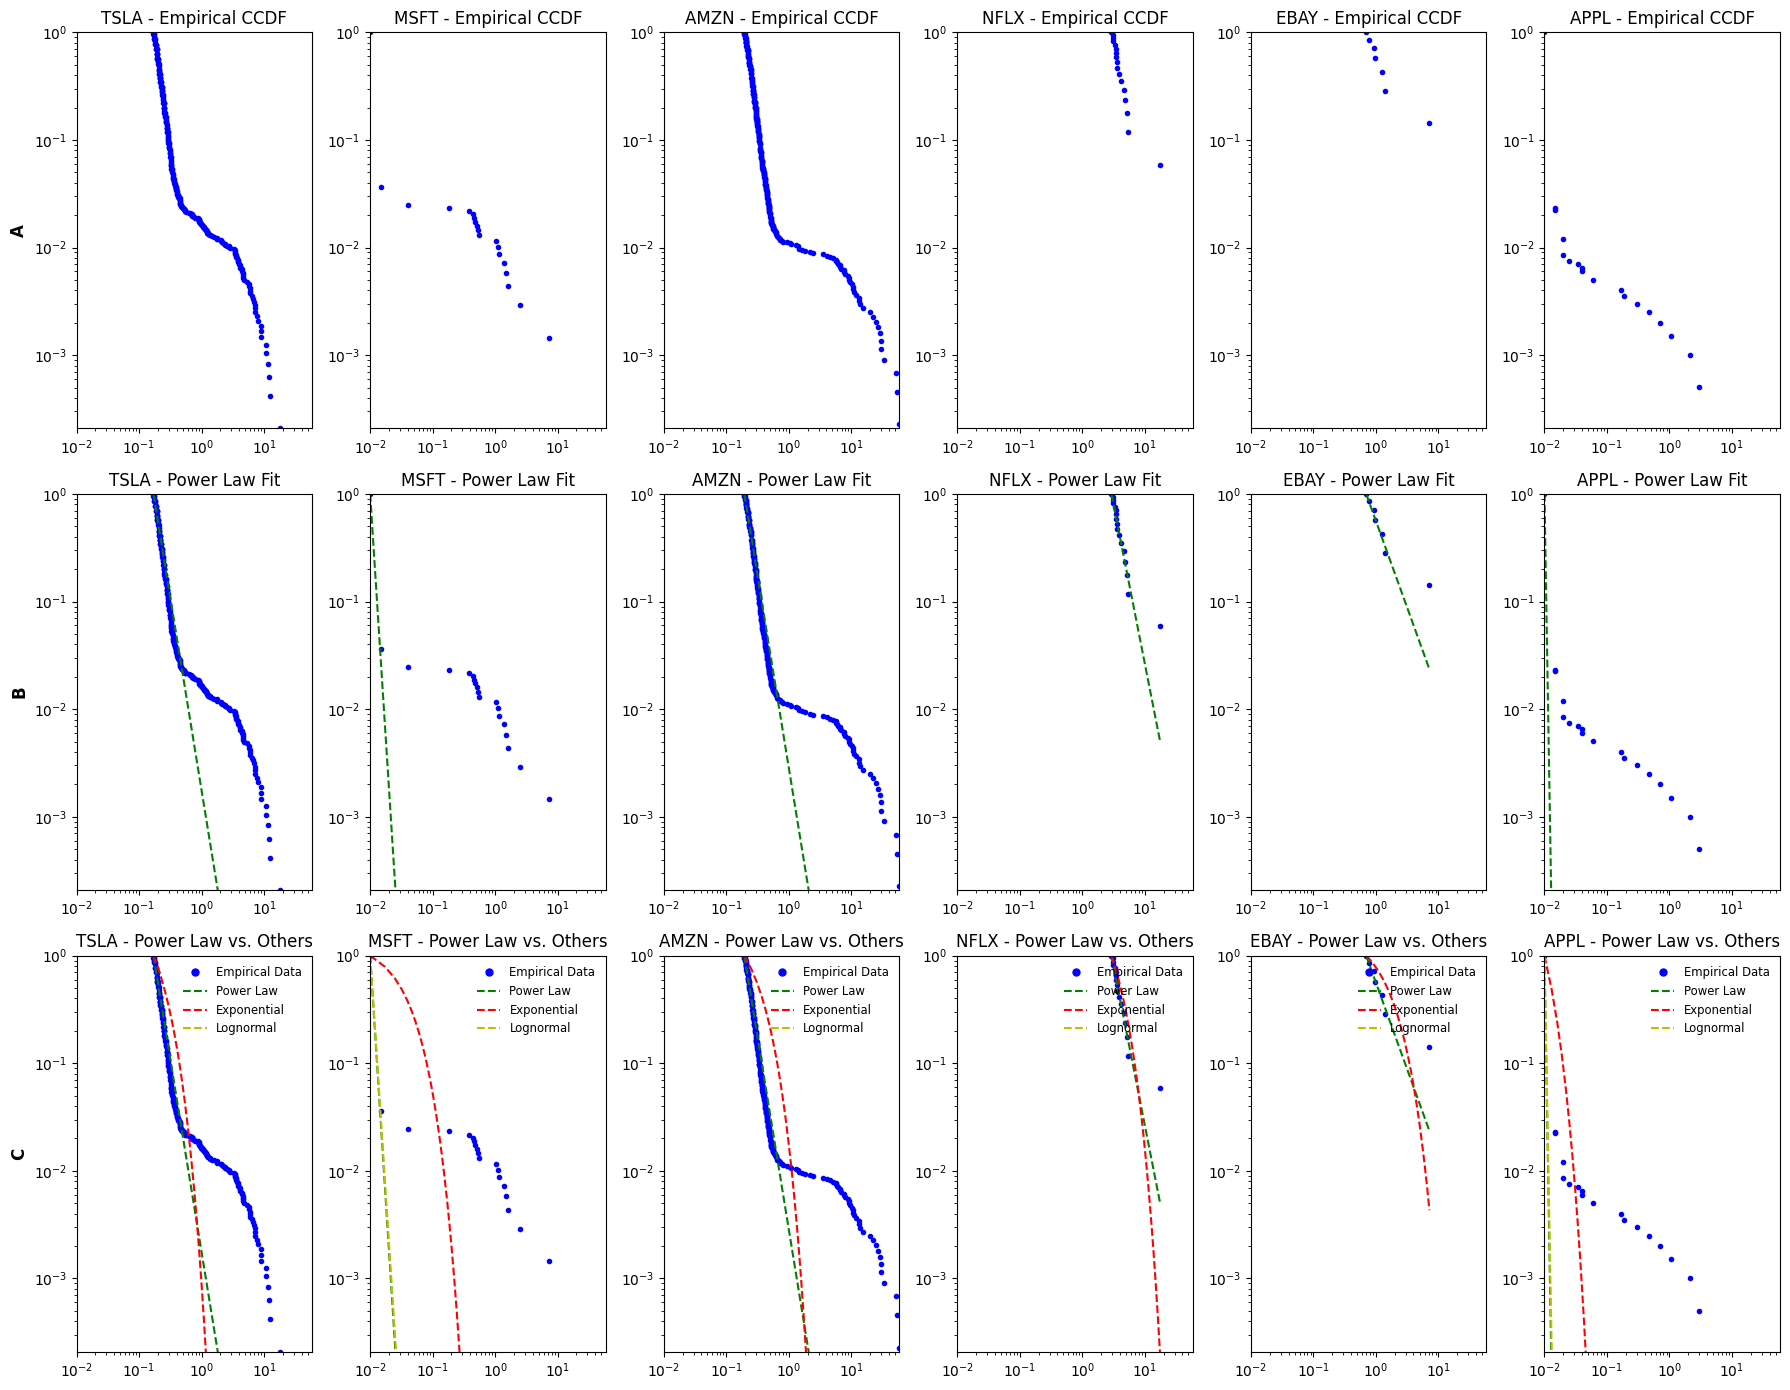

In [9]:
# Plot fitted objects
plot_fit_objects(returns_fit_objects)

#### 1.3.1. Retrieve returns power law fitting results

In [10]:
# Get fitting parameters for specific distribution across all stocks
returns_power_results = get_fitting_params(returns_fit_objects, 'power_law')
print(returns_power_results)

  Stock Distribution      alpha   xmin  KS Distance
0  TSLA    power_law   4.579968  0.170     0.059691
1  MSFT    power_law  10.089273  0.010     0.024670
2  AMZN    power_law   4.578129  0.195     0.046574
3  NFLX    power_law   3.954674  2.930     0.069158
4  EBAY    power_law   2.610042  0.700     0.119348
5  APPL    power_law  35.358290  0.010     0.023057


In [11]:
# Average Alpha exponents across stocks
min_alpha = returns_power_results['alpha'].min()
max_alpha = returns_power_results['alpha'].max()
avg_alpha = returns_power_results['alpha'].mean()
std_dev_alpha = returns_power_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 2.6100417666752884
Max Alpha: 35.358290325415986
Average Alpha: 10.195062721575157
std_dev_alpha: 12.591691235415245


#### 1.3.2. Compare Alternative Distributions

In [12]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
returns_powerlaw_exponential = distribution_compare(returns_fit_objects, 'exponential')
display(returns_powerlaw_exponential)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,8.474702,0.170,4.579968,0.059691,0.316778,10.257308,1.097226e-24
1,MSFT,exponential,32.708246,0.010,10.089273,0.024670,0.812847,11.703129,1.228390e-31
2,AMZN,exponential,5.002249,0.195,4.578129,0.046574,0.426145,7.964798,1.654943e-15
3,NFLX,exponential,0.582999,2.930,3.954674,0.069158,0.202123,1.550417,1.210415e-01
4,EBAY,exponential,0.839313,0.700,2.610042,0.119348,0.274674,2.623748,8.696801e-03
5,APPL,exponential,237.783165,0.010,35.358290,0.023057,0.281995,8.278424,1.248160e-16


## 2. Percentage returns

In [13]:
# Compute percentage returns
tsla_percentage_returns = compute_returns(tsla_raw_df)['pct_returns']
msft_percentage_returns = compute_returns(msft_raw_df)['pct_returns']
amzn_percentage_returns = compute_returns(amzn_raw_df)['pct_returns']
nflx_percentage_returns = compute_returns(nflx_raw_df)['pct_returns']
ebay_percentage_returns = compute_returns(ebay_raw_df)['pct_returns']
appl_percentage_returns = compute_returns(appl_raw_df)['pct_returns']

percentage_returns = {
  'TSLA': tsla_percentage_returns,
  'MSFT': msft_percentage_returns,
  'AMZN': amzn_percentage_returns,
  'NFLX': nflx_percentage_returns,
  'EBAY': ebay_percentage_returns,
  'APPL': appl_percentage_returns
}
# Update the dictionary to only keep the first EVENTS_RANGE items
# percentage_returns = {stock: data.head(EVENTS_RANGE) for stock, data in percentage_returns.items()}

### 2.1. Stationarity Test

In [14]:
# ADF test
for stock, data in percentage_returns.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

TSLA
ADF: -67.26
p-value: 0.00,
N: 99976, 
critical values: {'1%': -3.430415410377573, '5%': -2.861568910362029, '10%': -2.566785387974081}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -50.40
p-value: 0.00,
N: 99962, 
critical values: {'1%': -3.430415419538742, '5%': -2.8615689144110776, '10%': -2.566785390129256}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -315.43
p-value: 0.00,
N: 99999, 
critical values: {'1%': -3.4304153953326493, '5%': -2.8615689037124814, '10%': -2.566785384434747}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -227.55
p-value: 0.00,
N: 99998, 
critical values: {'1%': -3.4304153959866324, '5%': -2.861568904001529, '10%': -2.5667853845885973}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


EBAY


### 2.2. Percentage return density functions

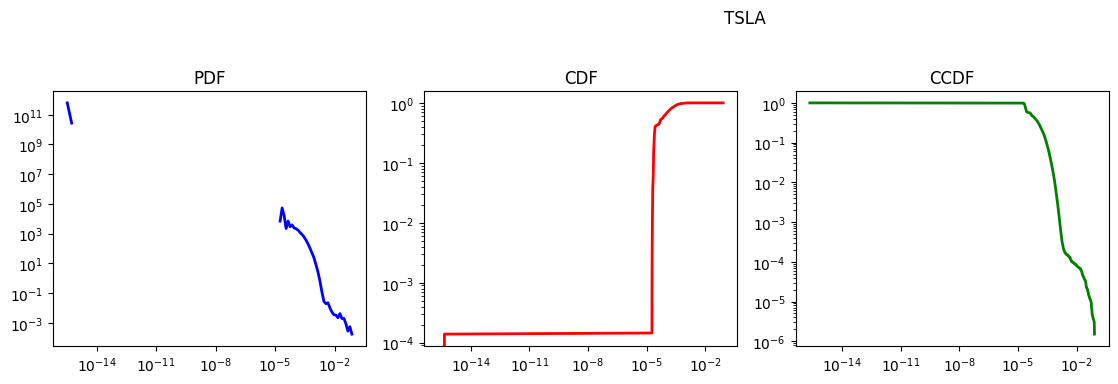

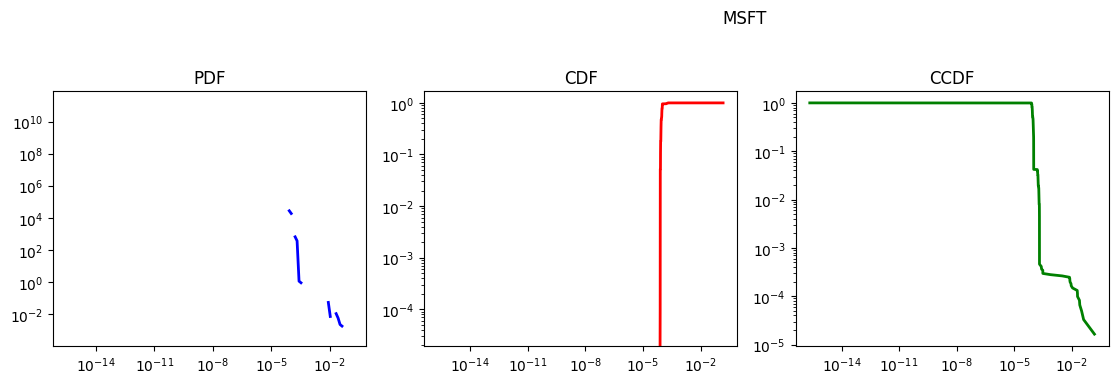

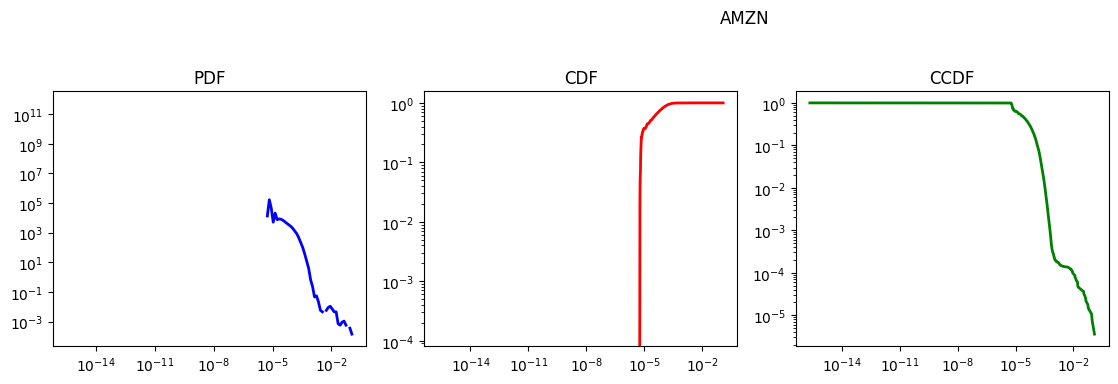

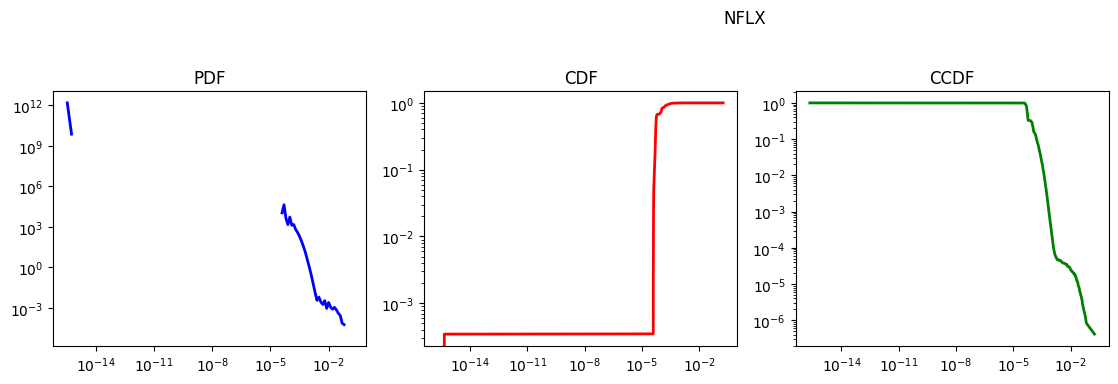

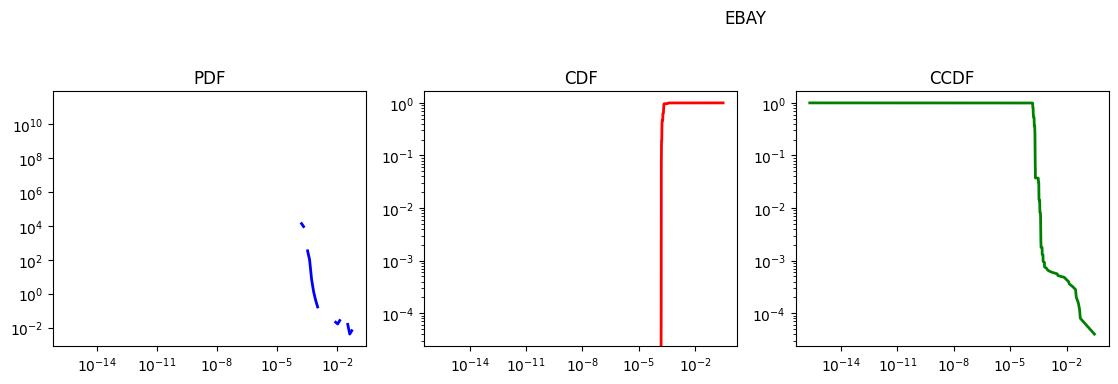

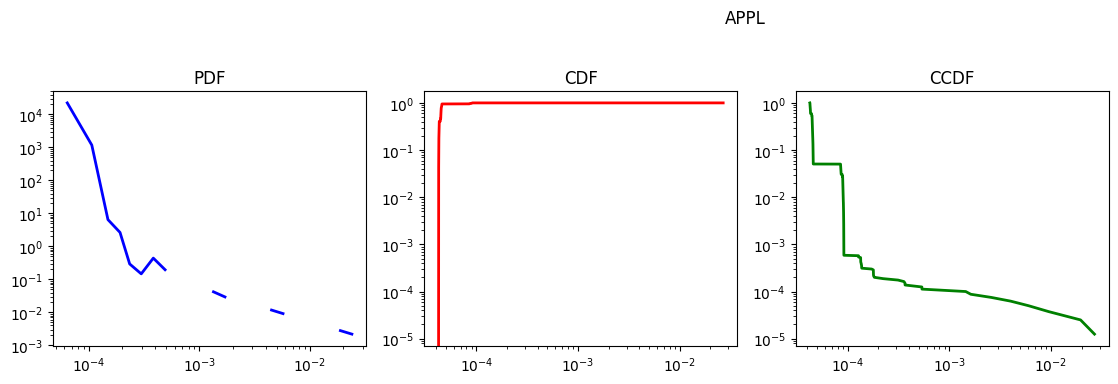

In [15]:
# Plot distribution of returns_magnitudes for each stock
for stock_name, data in percentage_returns.items():
    plot_distributions(stock_name, data)

### 2.3. Fit power law distribution to percentage returns

In [16]:
# 1. Fit Powerlaw and retrieve fitted object/ results
percentage_returns_distributions_data = os.path.join(root_dir, 'data', 'generated', 'lo_data', 'distributions', 'lo_percentage_returns_distributions.pkl')

if not os.path.exists(percentage_returns_distributions_data):
    percentage_returns_fit_objects = fit_powerlaw(data_dict=percentage_returns, filename=percentage_returns_distributions_data)
else:
    percentage_returns_fit_objects = load_fit_objects(percentage_returns_distributions_data)

percentage_returns_fit_objects

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


{'TSLA': <powerlaw.Fit at 0x6152fbf10>,
 'MSFT': <powerlaw.Fit at 0x3134b1a10>,
 'AMZN': <powerlaw.Fit at 0x3963eb450>,
 'NFLX': <powerlaw.Fit at 0x33ce0cb10>,
 'EBAY': <powerlaw.Fit at 0x33ce0eed0>,
 'APPL': <powerlaw.Fit at 0x39638f410>}

/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1507: RuntimeWarning: overflow encountered in divide
  likelihoods = f/C
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: divide by zero encountered in divide
  CDF = CDF/norm
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution give

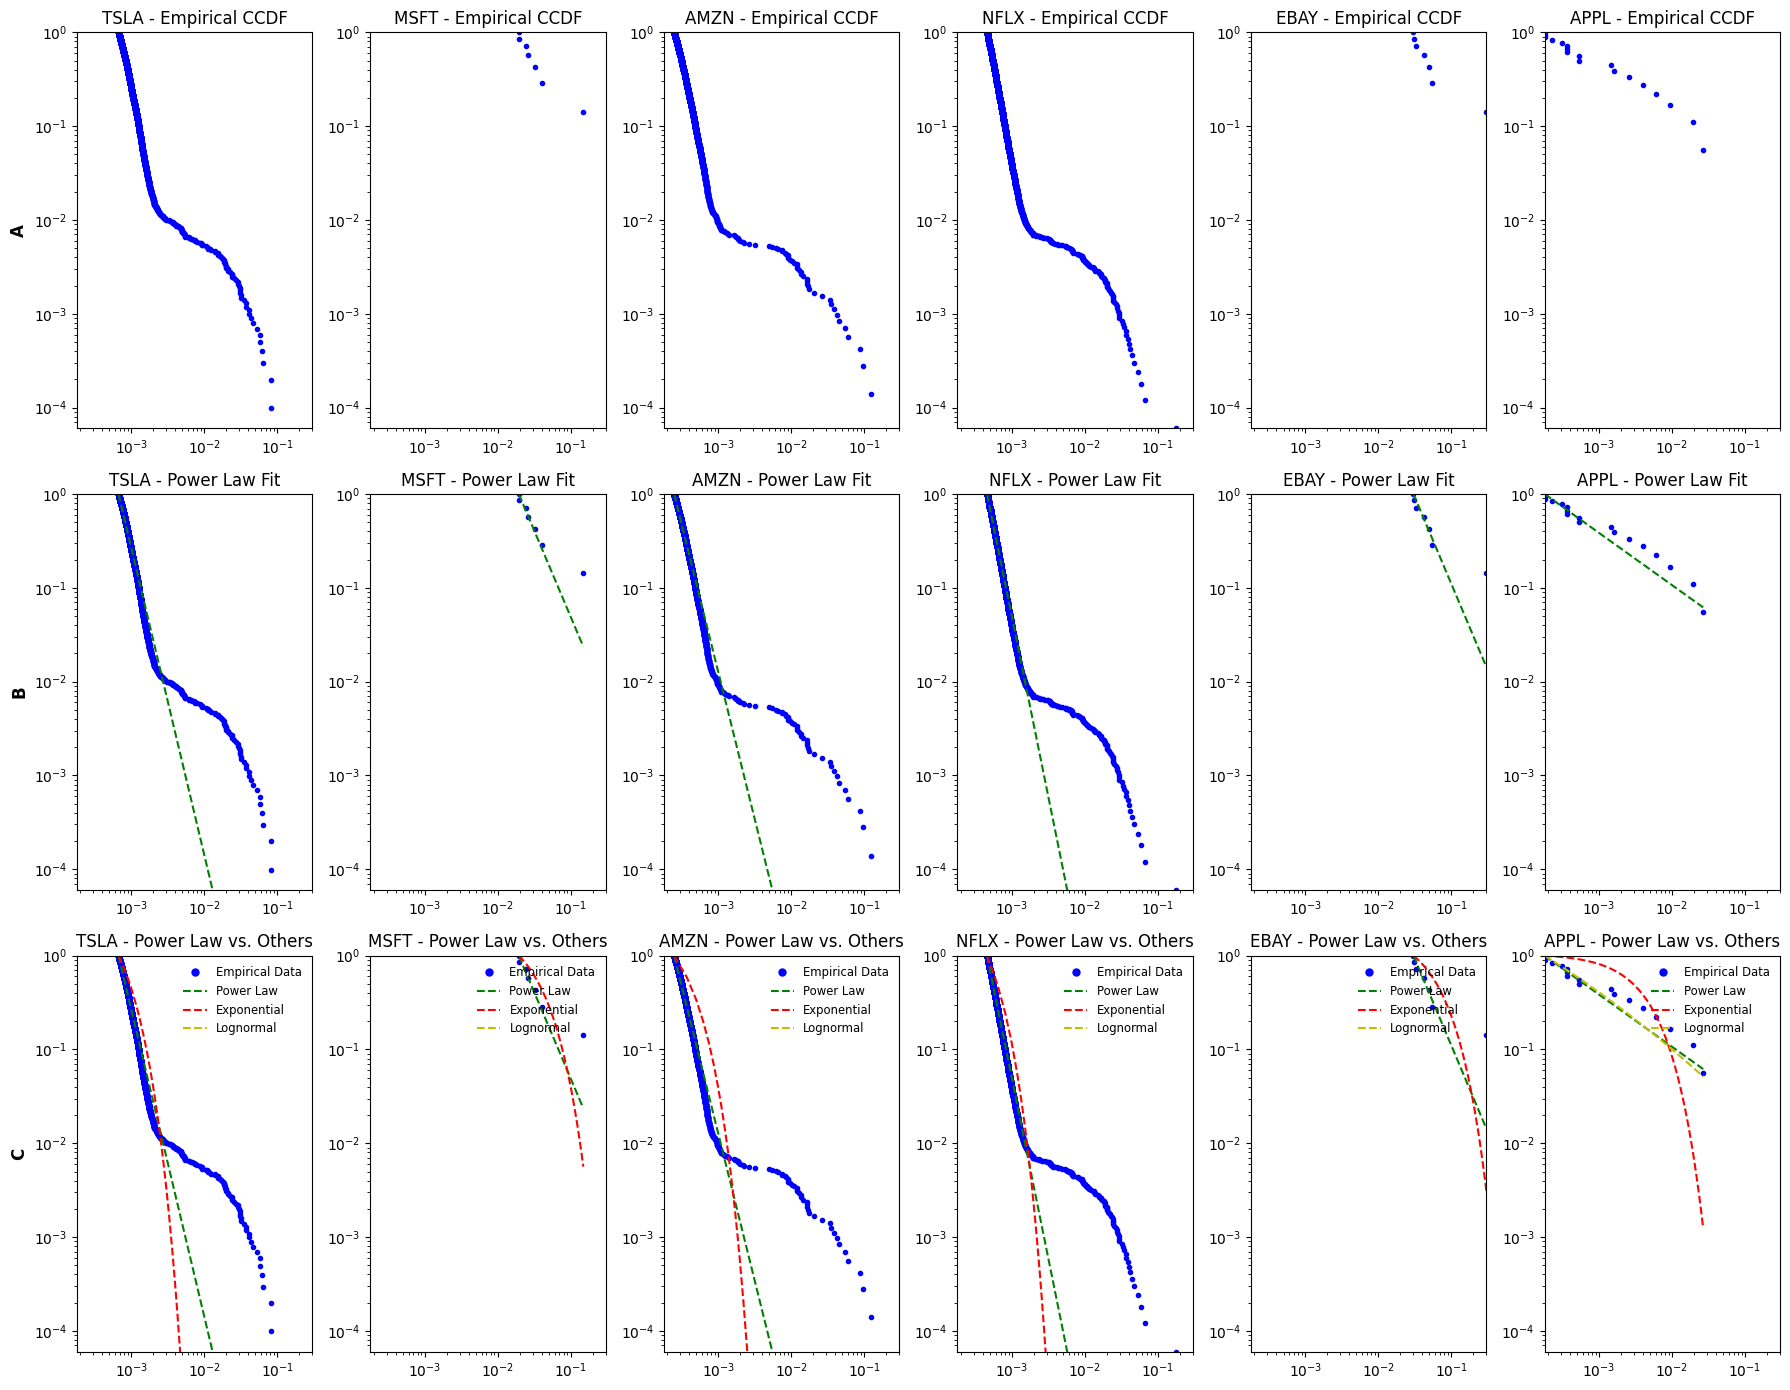

In [17]:
# Plot fitted objects
plot_fit_objects(percentage_returns_fit_objects)

#### 2.3.1. Retrieve Power law fitting results

In [18]:
# Get fitting parameters for specific distribution across all stocks
percentage_returns_power_results = get_fitting_params(percentage_returns_fit_objects, 'power_law')
print(percentage_returns_power_results)

  Stock Distribution     alpha      xmin  KS Distance
0  TSLA    power_law  4.272838  0.000670     0.029274
1  MSFT    power_law  2.840100  0.019426     0.124506
2  AMZN    power_law  4.135783  0.000248     0.025302
3  NFLX    power_law  4.842134  0.000456     0.023292
4  EBAY    power_law  2.843827  0.030140     0.136063
5  APPL    power_law  1.556402  0.000180     0.131546


In [19]:
# Average Alpha exponents across stocks
min_alpha = percentage_returns_power_results['alpha'].min()
max_alpha = percentage_returns_power_results['alpha'].max()
avg_alpha = percentage_returns_power_results['alpha'].mean()
std_dev_alpha = percentage_returns_power_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 1.5564021696674248
Max Alpha: 4.8421341279140355
Average Alpha: 3.4151806623557626
std_dev_alpha: 1.2168205278944408


#### 2.3.2. Compare Alternative Distributions

In [20]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
percentage_returns_powerlaw_exponential = distribution_compare(percentage_returns_fit_objects, 'exponential')
display(percentage_returns_powerlaw_exponential)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,2420.638560,0.000670,4.272838,0.029274,0.196770,8.209673,2.217920e-16
1,MSFT,exponential,39.994481,0.019426,2.840100,0.124506,0.206927,2.025034,4.286392e-02
2,AMZN,exponential,4334.800107,0.000248,4.135783,0.025302,0.317834,6.060617,1.356000e-09
3,NFLX,exponential,3984.955059,0.000456,4.842134,0.023292,0.233251,8.318202,8.930806e-17
4,EBAY,exponential,21.299987,0.030140,2.843827,0.136063,0.321121,3.226729,1.252142e-03
5,APPL,exponential,251.978716,0.000180,1.556402,0.131546,0.413606,2.184110,2.895419e-02


## 3. Log Returns

In [21]:
# Compute log returns
tsla_log_returns = compute_returns(tsla_raw_df, )['log_returns']
msft_log_returns = compute_returns(msft_raw_df, )['log_returns']
amzn_log_returns = compute_returns(amzn_raw_df,)['log_returns']
nflx_log_returns = compute_returns(nflx_raw_df, )['log_returns']
ebay_log_returns = compute_returns(ebay_raw_df,)['log_returns']
appl_log_returns = compute_returns(appl_raw_df,)['log_returns']

log_returns = {
  'TSLA': tsla_log_returns,
  'MSFT': msft_log_returns,
  'AMZN': amzn_log_returns,
  'NFLX': nflx_log_returns,
  'EBAY': ebay_log_returns,
  'APPL': appl_log_returns
}
# Update the dictionary to only keep the first EVENTS_RANGE items
# log_returns = {stock: data.head(EVENTS_RANGE) for stock, data in log_returns.items()}

### 3.1. Stationarity Test

In [22]:
# ADF test
for stock, data in log_returns.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

TSLA
ADF: -67.27
p-value: 0.00,
N: 99975, 
critical values: {'1%': -3.430415411031857, '5%': -2.8615689106512088, '10%': -2.566785388128002}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -50.40
p-value: 0.00,
N: 99961, 
critical values: {'1%': -3.4304154201932096, '5%': -2.8615689147003387, '10%': -2.56678539028322}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -315.40
p-value: 0.00,
N: 99998, 
critical values: {'1%': -3.4304153959866324, '5%': -2.861568904001529, '10%': -2.5667853845885973}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -227.48
p-value: 0.00,
N: 99997, 
critical values: {'1%': -3.4304153966406288, '5%': -2.8615689042905816, '10%': -2.5667853847424507}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


EBA

### 3.2. Log return density functions

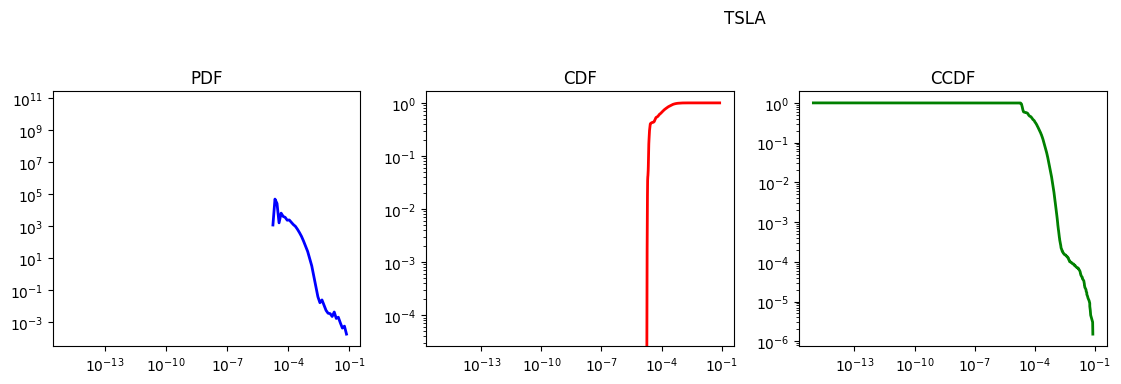

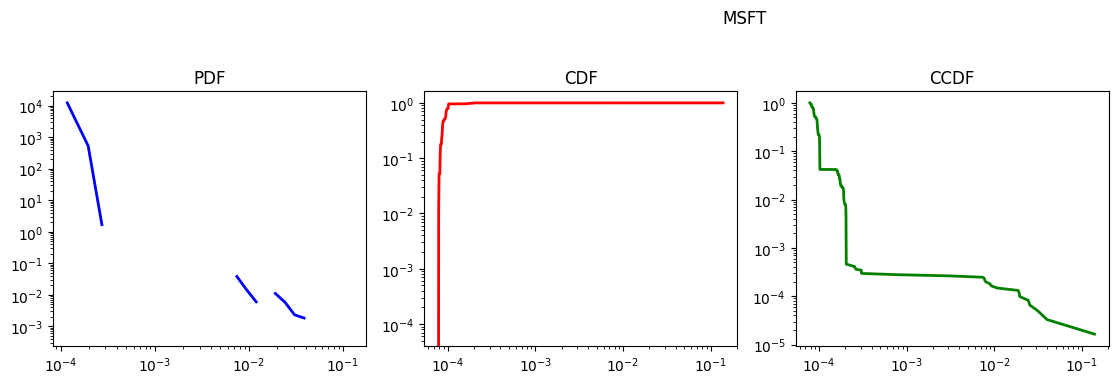

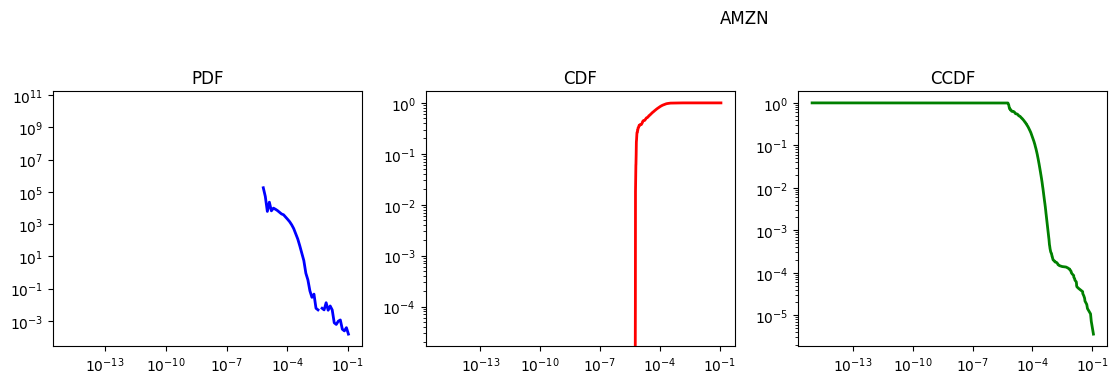

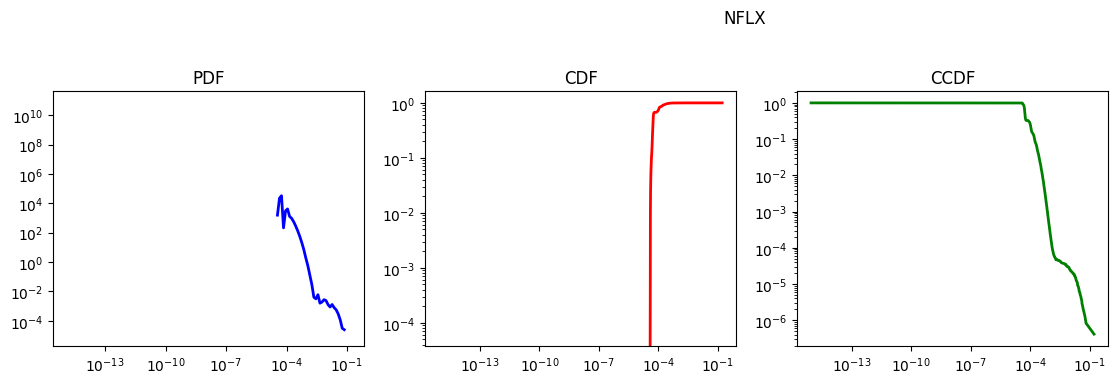

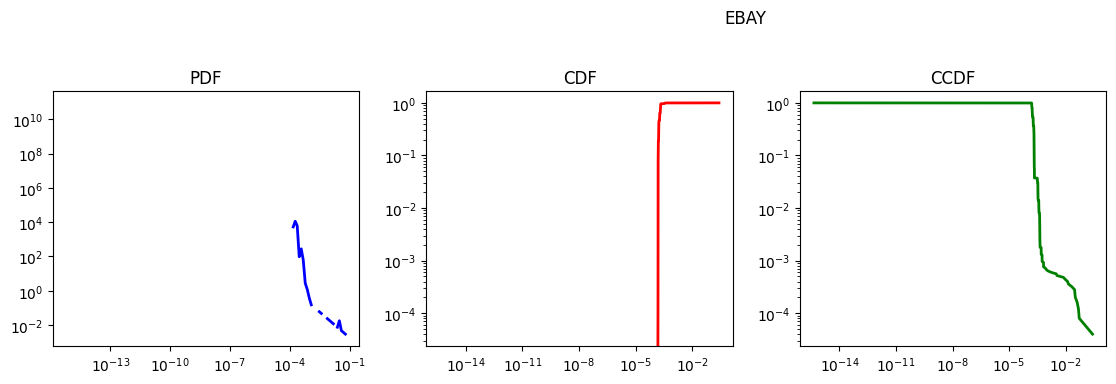

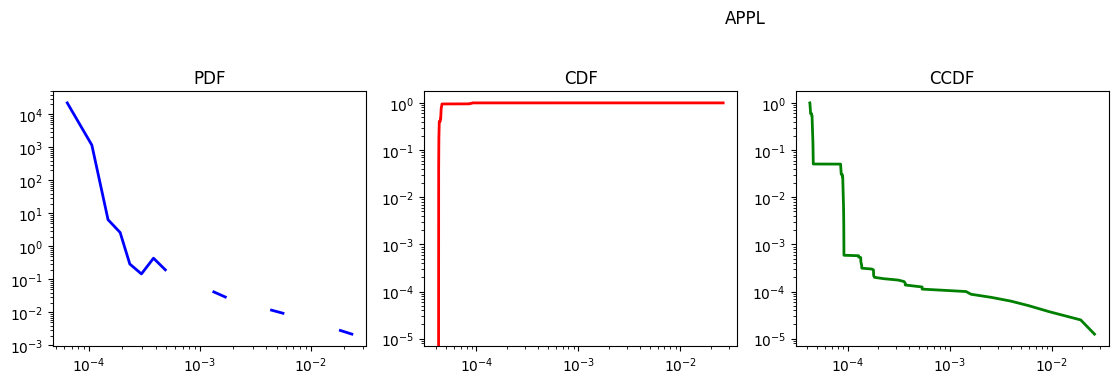

In [23]:
# Plot distribution of returns_magnitudes for each stock
for stock_name, data in log_returns.items():
    plot_distributions(stock_name, data)

### 3.3. Fit power law distribution to log returns

In [24]:
# 1. Fit Powerlaw and retrieve fitted object/ results
log_returns_distributions_data = os.path.join(root_dir, 'data', 'generated', 'lo_data', 'distributions', 'lo_log_returns_distributions.pkl')

if not os.path.exists(log_returns_distributions_data):
    log_returns_fit_objects = fit_powerlaw(data_dict=log_returns, filename=log_returns_distributions_data)
else:
    log_returns_fit_objects = load_fit_objects(log_returns_distributions_data)

log_returns_fit_objects

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


{'TSLA': <powerlaw.Fit at 0x615323110>,
 'MSFT': <powerlaw.Fit at 0x4e3e43910>,
 'AMZN': <powerlaw.Fit at 0x4a4c38550>,
 'NFLX': <powerlaw.Fit at 0x615362850>,
 'EBAY': <powerlaw.Fit at 0x2a98166d0>,
 'APPL': <powerlaw.Fit at 0x33cedfa10>}

/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1507: RuntimeWarning: overflow encountered in divide
  likelihoods = f/C
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: divide by zero encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution give

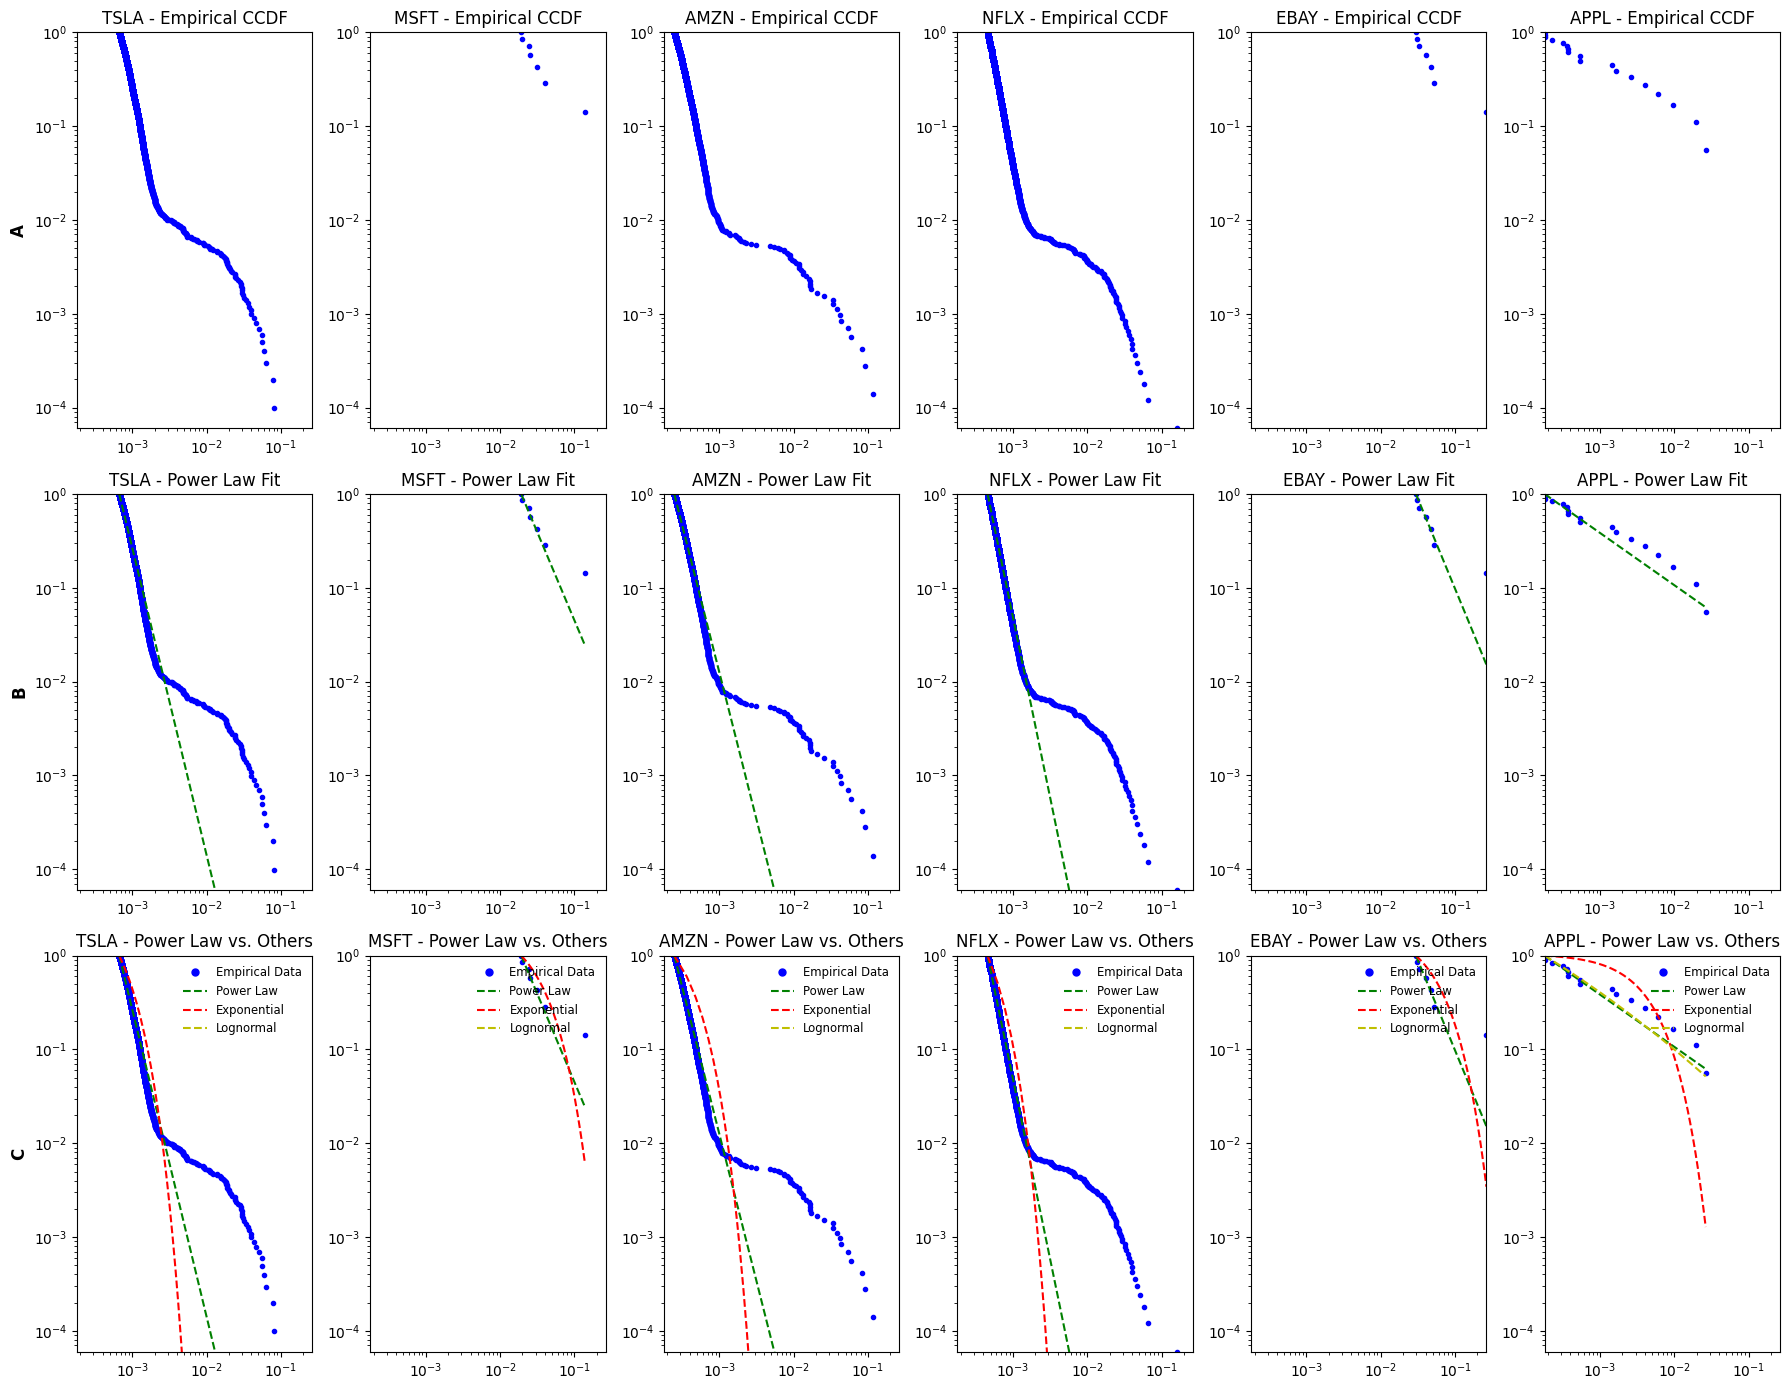

In [25]:
# Plot fitted objects
plot_fit_objects(log_returns_fit_objects)

#### 3.3.1. Retrieve Power law fitting results

In [26]:
# Get fitting parameters for specific distribution across all stocks
log_returns_power_results = get_fitting_params(log_returns_fit_objects, 'power_law')
print(log_returns_power_results)

  Stock Distribution     alpha      xmin  KS Distance
0  TSLA    power_law  4.275037  0.000670     0.029363
1  MSFT    power_law  2.881066  0.019240     0.124280
2  AMZN    power_law  4.136904  0.000248     0.025257
3  NFLX    power_law  4.843973  0.000456     0.023304
4  EBAY    power_law  2.918349  0.029695     0.132700
5  APPL    power_law  1.557013  0.000180     0.131834


In [27]:
# Average Alpha exponents across stocks
min_alpha = log_returns_power_results['alpha'].min()
max_alpha = log_returns_power_results['alpha'].max()
avg_alpha = log_returns_power_results['alpha'].mean()
std_dev_alpha = log_returns_power_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 1.557012723934386
Max Alpha: 4.843973066949808
Average Alpha: 3.435390338727172
std_dev_alpha: 1.2069916320275986


#### 3.3.2. Compare Alternative Distributions

In [28]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
log_returns_powerlaw_exponential = distribution_compare(log_returns_fit_objects, 'exponential')
display(log_returns_powerlaw_exponential)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,2439.507935,0.000670,4.275037,0.029363,0.194340,8.243020,1.679178e-16
1,MSFT,exponential,42.702292,0.019240,2.881066,0.124280,0.198363,1.930930,5.349172e-02
2,AMZN,exponential,4399.464175,0.000248,4.136904,0.025257,0.313195,6.110145,9.954070e-10
3,NFLX,exponential,4021.642209,0.000456,4.843973,0.023304,0.230331,8.524919,1.529173e-17
4,EBAY,exponential,24.230635,0.029695,2.918349,0.132700,0.293888,3.004544,2.659792e-03
5,APPL,exponential,254.169883,0.000180,1.557013,0.131834,0.412919,2.173171,2.976743e-02


## 4. Return magnitudes (volatility)

In [29]:
# Return magnitude (volatility)
tsla_volatility = compute_returns(tsla_raw_df)['volatility']
msft_volatility = compute_returns(msft_raw_df)['volatility']
amzn_volatility = compute_returns(amzn_raw_df)['volatility']
nflx_volatility = compute_returns(nflx_raw_df)['volatility']
ebay_volatility = compute_returns(ebay_raw_df)['volatility']
appl_volatility = compute_returns(appl_raw_df)['volatility']

return_magnitudes = {
  'TSLA': tsla_volatility,
  'MSFT': msft_volatility,
  'AMZN': amzn_volatility,
  'NFLX': nflx_volatility,
  'EBAY': ebay_volatility,
  'APPL': appl_volatility
}
# Update the dictionary to only keep the first EVENTS_RANGE items
# return_magnitudes = {stock: data.head(1000000) for stock, data in return_magnitudes.items()}

### 4.1. Stationarity Test

In [30]:
# ADF test
for stock, data in return_magnitudes.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

TSLA
ADF: -28.70
p-value: 0.00,
N: 99934, 
critical values: {'1%': -3.4304154378687812, '5%': -2.8615689225125784, '10%': -2.5667853944414167}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -80.63
p-value: 0.00,
N: 99983, 
critical values: {'1%': -3.4304154057979503, '5%': -2.86156890833793, '10%': -2.5667853868967203}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -314.38
p-value: 0.00,
N: 99999, 
critical values: {'1%': -3.4304153953326493, '5%': -2.8615689037124814, '10%': -2.566785384434747}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -50.85
p-value: 0.00,
N: 99969, 
critical values: {'1%': -3.4304154149578365, '5%': -2.8615689123864114, '10%': -2.566785389051593}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


EBA

### 4.2. Volatility density functions

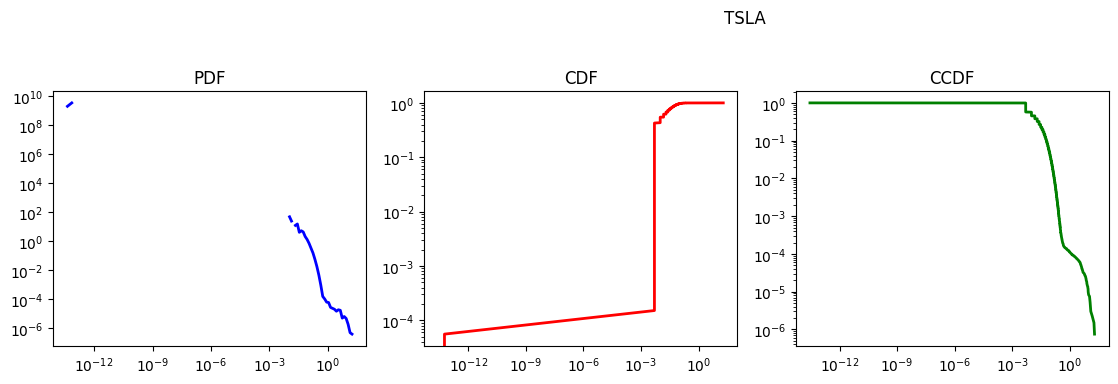

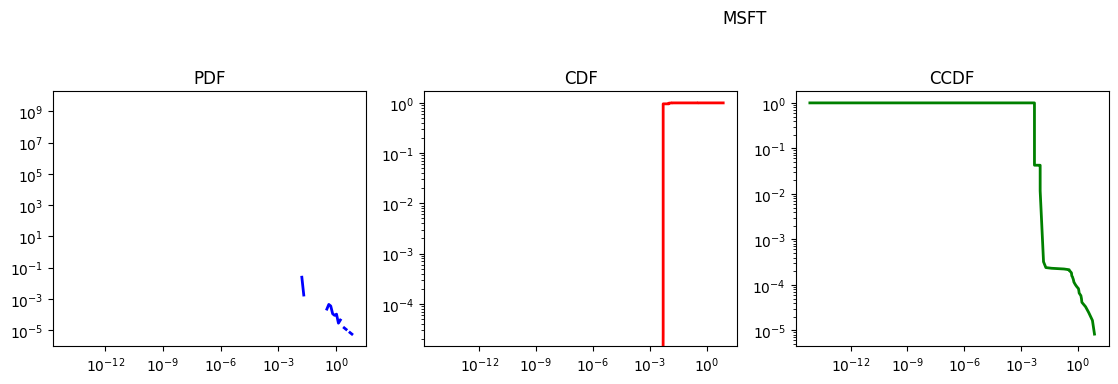

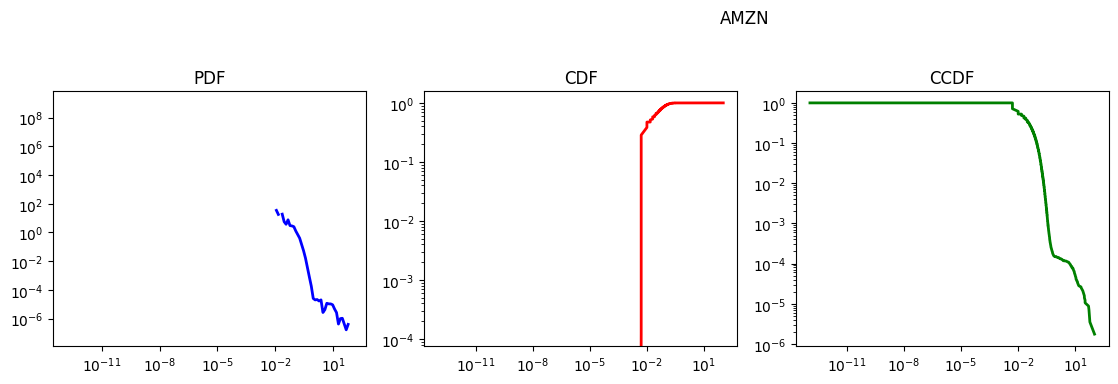

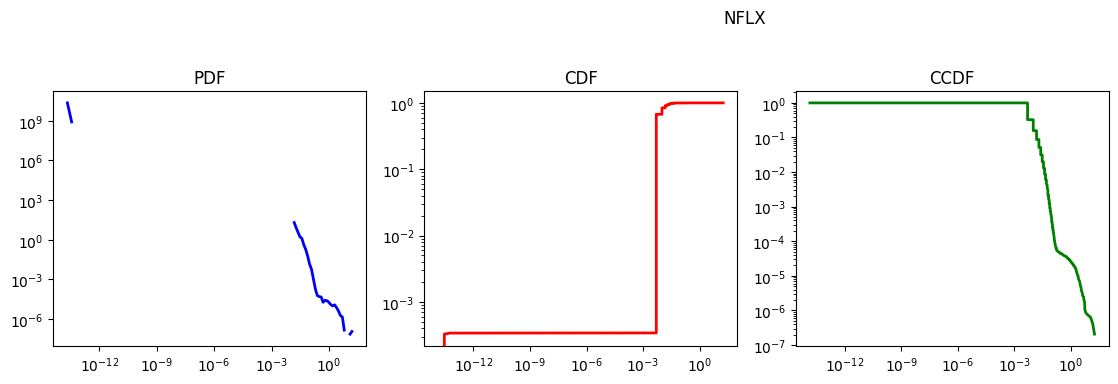

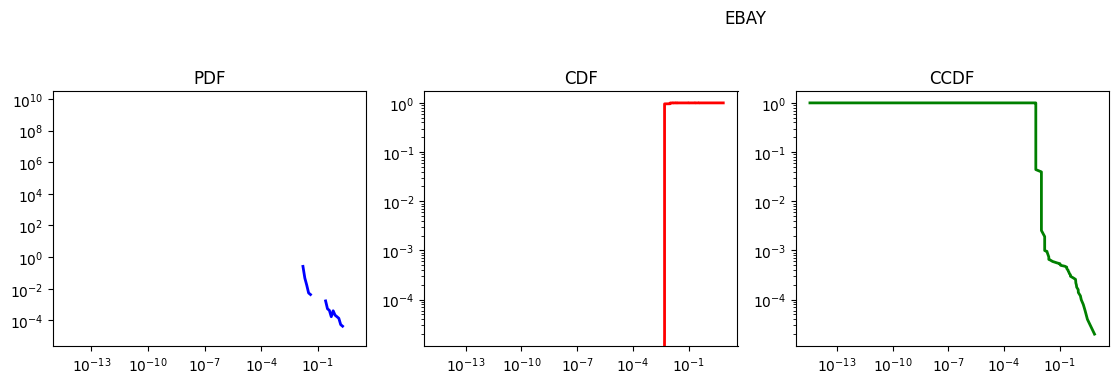

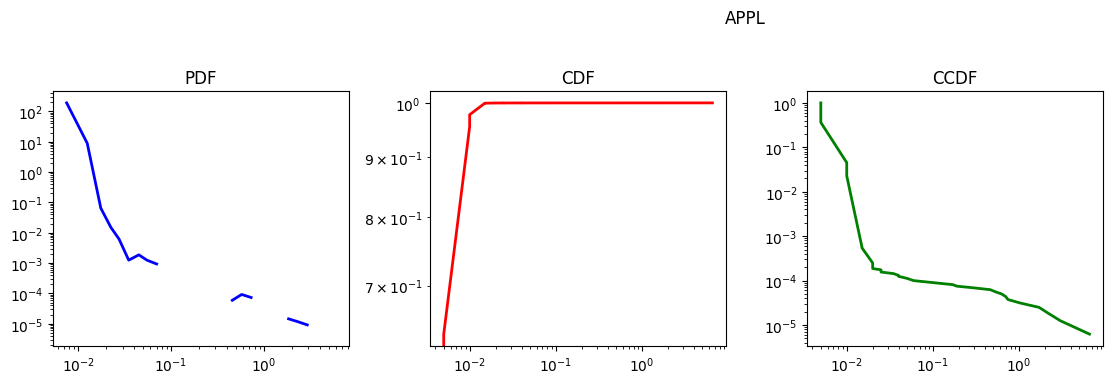

In [31]:
# Plot distribution of returns_magnitudes for each stock
for stock_name, data in return_magnitudes.items():
    plot_distributions(stock_name, data)

### 4.3. Fit power law distribution to log returns

In [32]:
# 1. Fit Powerlaw and retrieve fitted object/ results
volatility_data = os.path.join(root_dir, 'data', 'generated', 'lo_data', 'distributions', 'lo_volatility_distributions.pkl')

if not os.path.exists(volatility_data):
    volatility_fit_objects = fit_powerlaw(data_dict=return_magnitudes, filename=volatility_data)
else:
    volatility_fit_objects = load_fit_objects(volatility_data)

volatility_fit_objects

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


{'TSLA': <powerlaw.Fit at 0x4e3d8b510>,
 'MSFT': <powerlaw.Fit at 0x2ae140590>,
 'AMZN': <powerlaw.Fit at 0x2a999b3d0>,
 'NFLX': <powerlaw.Fit at 0x2a9e01a10>,
 'EBAY': <powerlaw.Fit at 0x2aa4507d0>,
 'APPL': <powerlaw.Fit at 0x2a9d34650>}

/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1507: RuntimeWarning: overflow encountered in divide
  likelihoods = f/C
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overf

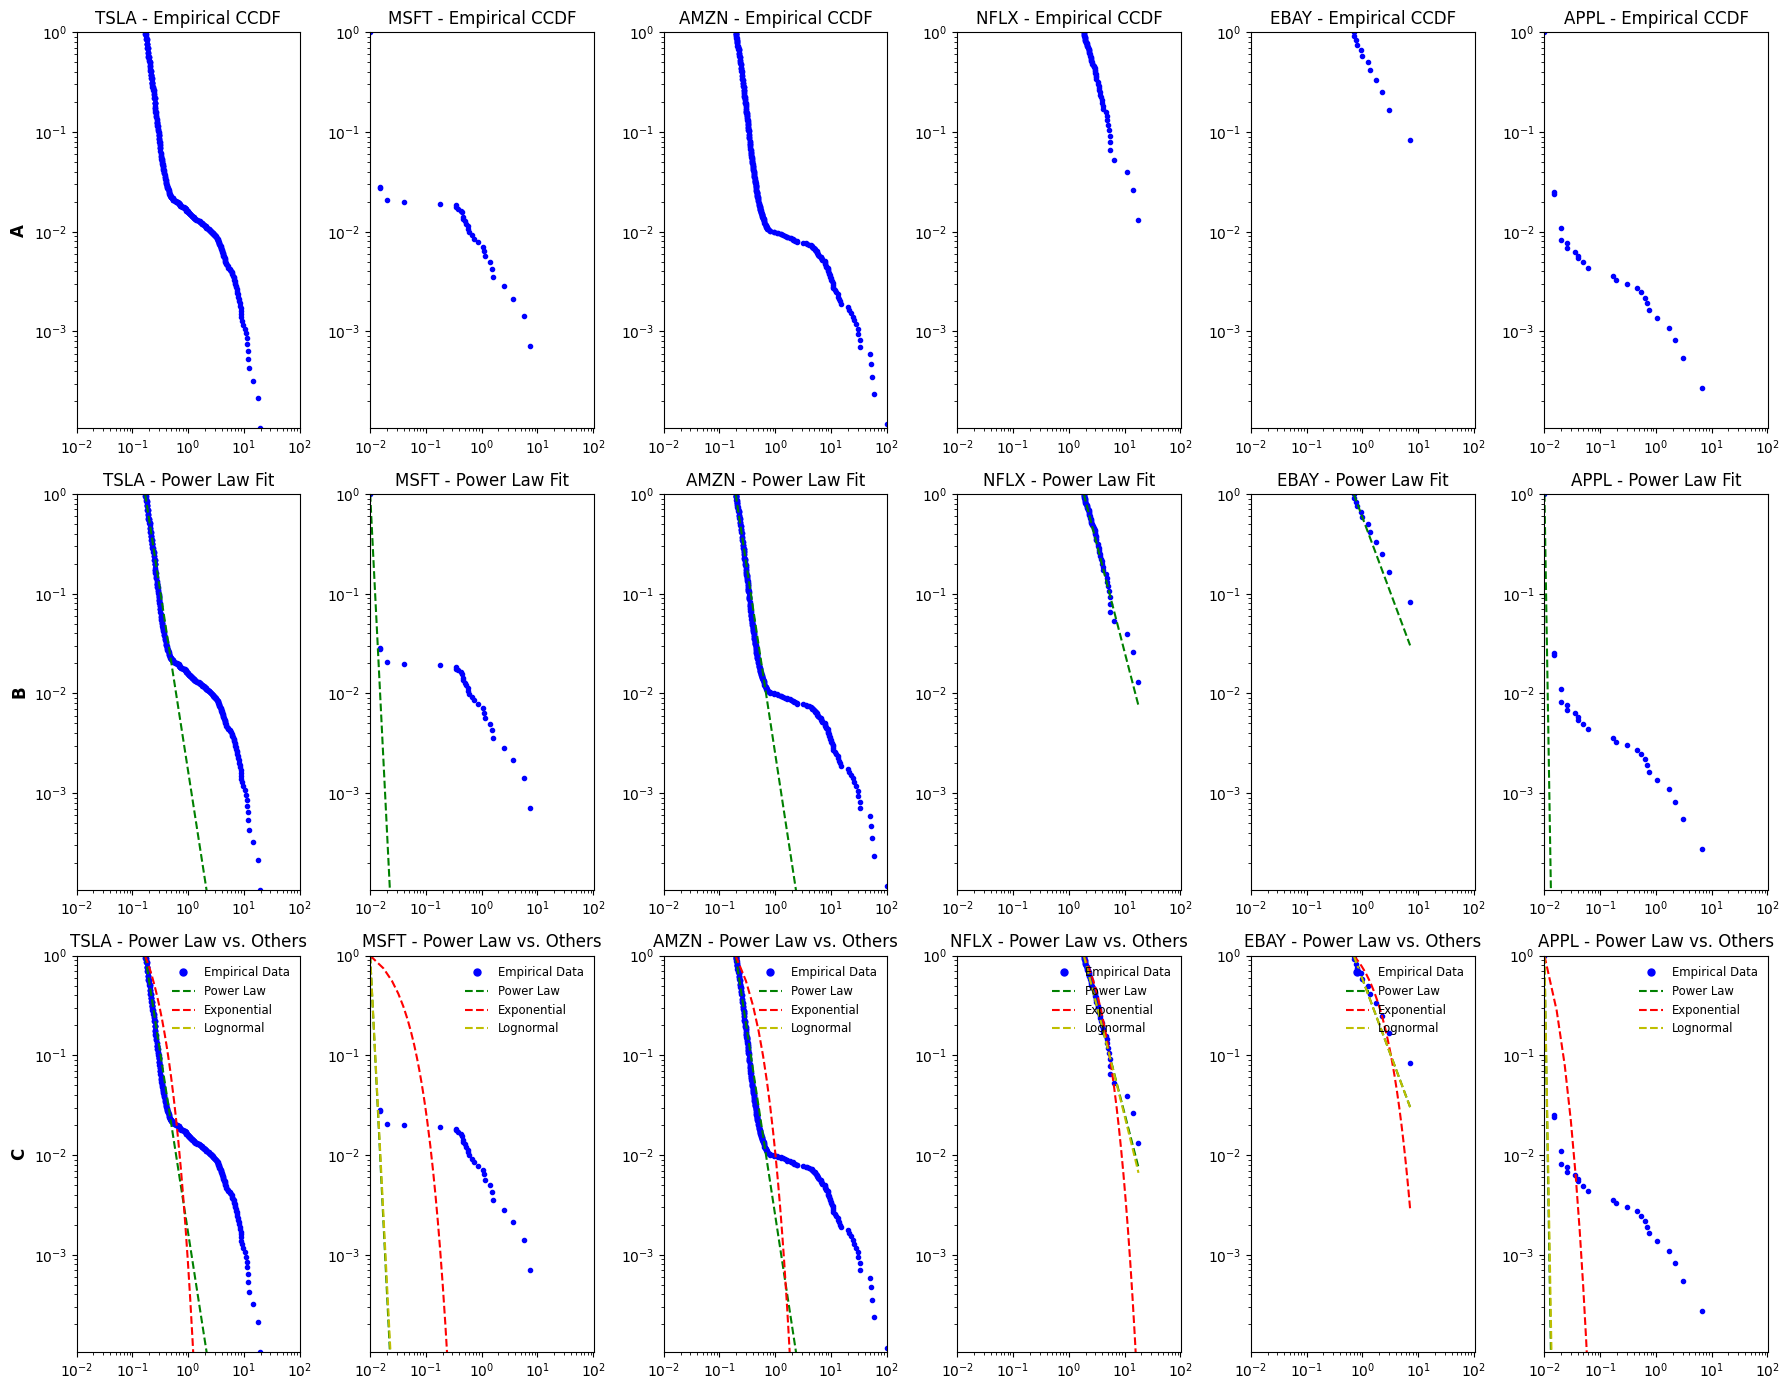

In [33]:
# Plot fitted objects
plot_fit_objects(volatility_fit_objects)

#### 4.3.1. Retrieve Power law fitting results

In [34]:
# Get fitting parameters for specific distribution across all stocks
volatility_fit_results = get_fitting_params(volatility_fit_objects, 'power_law')
print(volatility_fit_results)

  Stock Distribution      alpha   xmin  KS Distance
0  TSLA    power_law   4.607120  0.170     0.057061
1  MSFT    power_law  12.213590  0.010     0.020161
2  AMZN    power_law   4.671048  0.195     0.046804
3  NFLX    power_law   3.164796  1.860     0.057523
4  EBAY    power_law   2.500980  0.700     0.089008
5  APPL    power_law  35.377116  0.010     0.025177


In [35]:
# Average Alpha exponents across stocks
min_alpha = volatility_fit_results['alpha'].min()
max_alpha = volatility_fit_results['alpha'].max()
avg_alpha = volatility_fit_results['alpha'].mean()
std_dev_alpha = volatility_fit_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 2.5009802057965147
Max Alpha: 35.37711595216422
Average Alpha: 10.422441641705037
std_dev_alpha: 12.714271112006655


#### 3.3.2. Compare Alternative Distributions

In [36]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
volatility_powerlaw_exponential = distribution_compare(volatility_fit_objects, 'exponential')
display(volatility_powerlaw_exponential)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,8.589593,0.170,4.607120,0.057061,0.311394,13.912059,5.351644e-44
1,MSFT,exponential,39.915056,0.010,12.213590,0.020161,0.791399,15.434229,9.634482e-54
2,AMZN,exponential,5.636421,0.195,4.671048,0.046804,0.395724,8.672938,4.211111e-18
3,NFLX,exponential,0.654840,1.860,3.164796,0.057523,0.127480,1.576912,1.148158e-01
4,EBAY,exponential,0.900919,0.700,2.500980,0.089008,0.200744,1.188436,2.346618e-01
5,APPL,exponential,193.027056,0.010,35.377116,0.025177,0.356848,8.945230,3.711771e-19
